<a href="https://colab.research.google.com/github/Tanishi20079/RapportFoodoo_foodCategorization/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **CGAS Project**

In this we are going to do 
* Data Exploration
* Data Preprocessing
* Model training and testing
* Predict names of recipe
* Output- name of recipe, recipe information









In [ ]:
########################################################################################################################
#_____________________________________________________Import Section___________________________________________ 
########################################################################################################################
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os
import cv2
import scipy.io as sio
import ntpath
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# #
# ########################################################################################################################
# #_____________________________________________________Fetching The Training Data from Directory___________________________________________ 
# ########################################################################################################################


# train_dir='/content/drive/MyDrive/CGAS_FoodCategorization/Data_images'
# subdirs = [x[0] for x in os.walk(train_dir)]  

# train = []
# y_train = []
# for subdir in subdirs:                                                                                            
#         files = os.walk(subdir).__next__()[2]                                                                             
#         if (len(files) > 0):                                                                                          
#             for file in files:                                                                                        
#                 f1 = os.path.join(subdir, file)
#                 #print(f1)
#                 head, tail = ntpath.split(f1)
#                 #print(tail)
#                 name = tail.split("_")
#                 #print(name[0])
#                 label = name[0]
#                 img = cv2.imread(f1)
#                 img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
#                 if img is not None:
#                   train.append(img)
#                   y_train.append(label) 
# train
# # FOR TEST DATA
# test_dir = '/content/drive/MyDrive/CGAS_FoodCategorization/CGAS_Project/testing'
# subdirs = [x[0] for x in os.walk(test_dir)]  
# test = []
# y_test = []

# for subdir in subdirs:                                                                                            
#         files = os.walk(subdir).__next__()[2]                                                                             
#         if (len(files) > 0):                                                                                          
#             for file in files:                                                                                        
#                 f1 = os.path.join(subdir, file)
#                 #print(f1)
#                 head, tail = ntpath.split(f1)
#                 #print(tail)
#                 name = tail.split("_")
#                 #print(name[0])
#                 label = name[0]
#                 img = cv2.imread(f1)
#                 img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
#                 if img is not None:
#                   test.append(img)
#                   y_test.append(label) 

In [ ]:
#
########################################################################################################################
#_____________________________________________________Loading Data Section into the Dataframe___________________________________________ 
########################################################################################################################
#train_data = {'X_train': train ,'y_train':y_train}
#sio.savemat('/content/drive/MyDrive/CGAS_FoodCategorization/train_data25.mat', train_data
data = sio.loadmat('/content/drive/MyDrive/CGAS_FoodCategorization/train_data25.mat')

In [ ]:
X = data['X_train']
y = data['y_train']
#test = test_data['X_test']
#y_test = test_data['y_test']
len(X)

20389

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
np.unique(y_train)

array(['chocolate ', 'cup       ', 'donuts    ', 'dumplings ',
       'french    ', 'fried     ', 'garlic    ', 'gnocchi   ',
       'grilled   ', 'hamburger ', 'hot       ', 'ice       ',
       'macarons  ', 'mussels   ', 'nachos    ', 'pancakes  ',
       'pizza     ', 'red       ', 'samosa    ', 'spring    ',
       'strawberry', 'sushi     ', 'waffles   '], dtype='<U10')

In [ ]:
train = X_train

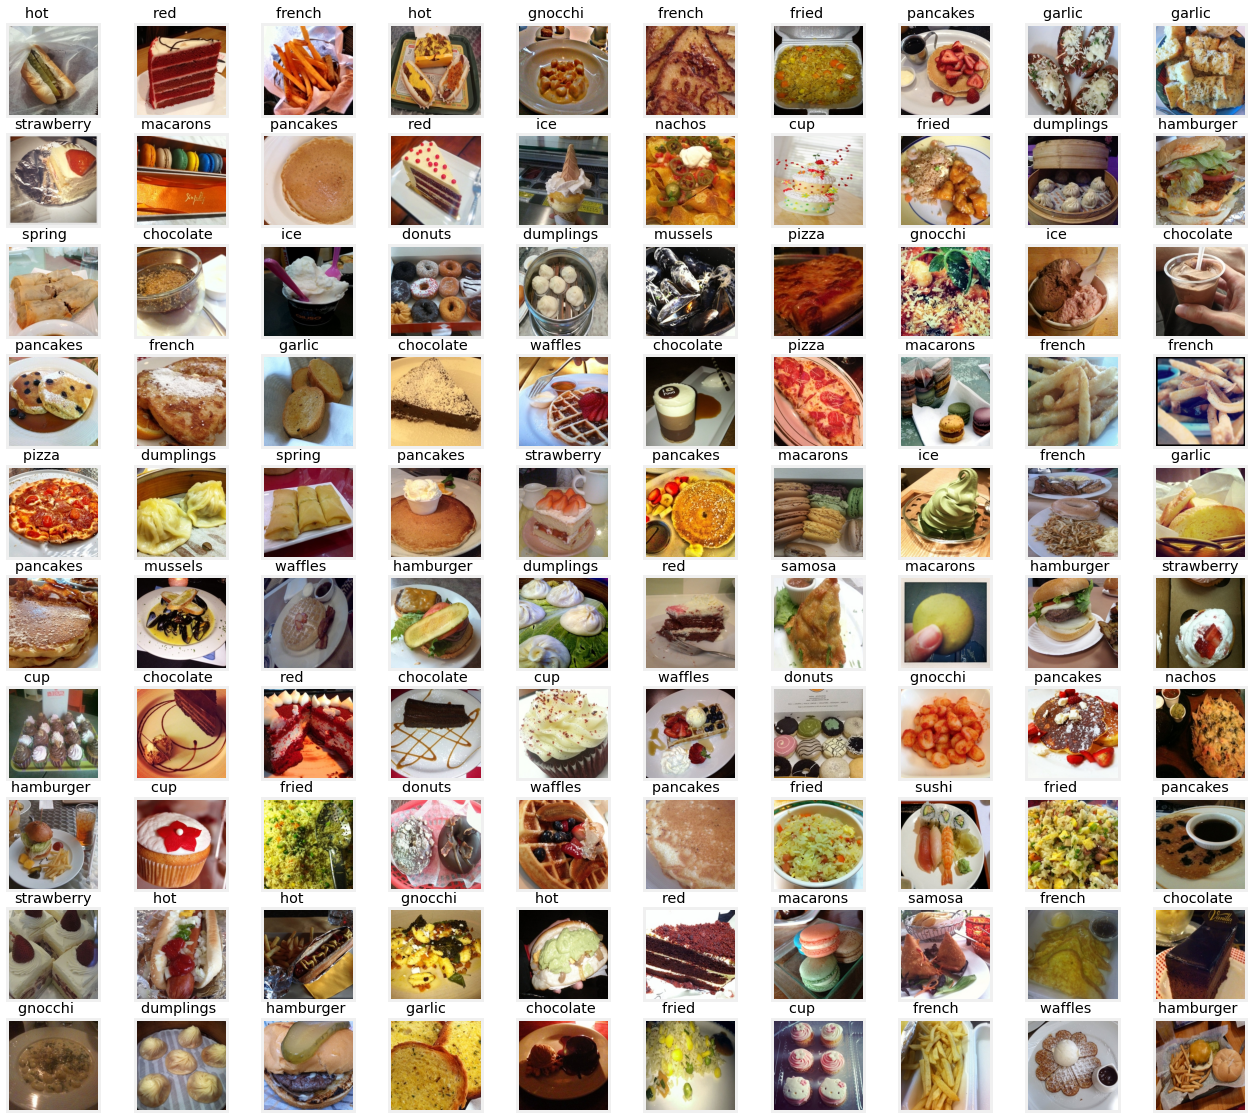

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(train[i])
    plt.title(y_train[i])
plt.show()

In [ ]:
freq_train = {}
for y in y_train:
  if y not in freq_train:
    freq_train[y] = 1

  else:
    freq_train[y] += 1
freq_train

{'chocolate ': 1433,
 'cup       ': 765,
 'donuts    ': 574,
 'dumplings ': 794,
 'french    ': 1409,
 'fried     ': 612,
 'garlic    ': 611,
 'gnocchi   ': 801,
 'grilled   ': 780,
 'hamburger ': 520,
 'hot       ': 703,
 'ice       ': 692,
 'macarons  ': 777,
 'mussels   ': 581,
 'nachos    ': 615,
 'pancakes  ': 666,
 'pizza     ': 546,
 'red       ': 620,
 'samosa    ': 618,
 'spring    ': 437,
 'strawberry': 598,
 'sushi     ': 528,
 'waffles   ': 631}

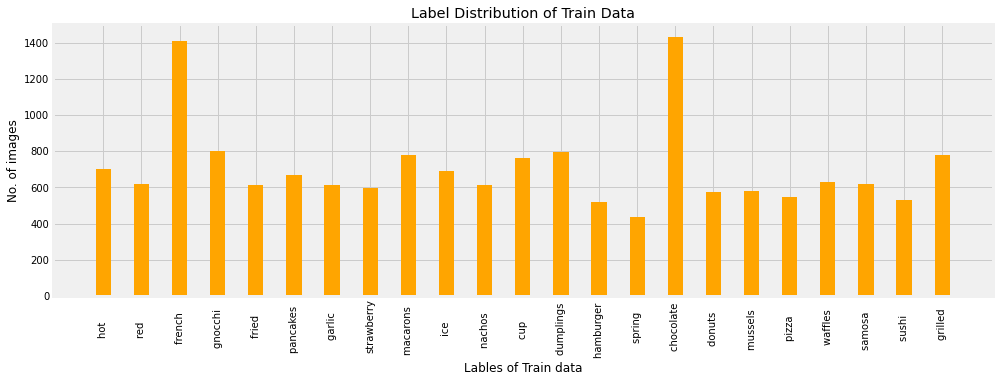

In [ ]:

########################################################################################################################
#_____________________________________________________Frequency Distribution Of Train Data___________________________________________ 
########################################################################################################################

labels = list(freq_train.keys()) 
values1 = list(freq_train.values()) 
fig = plt.figure(figsize = (15, 5)) 
# creating the bar plot 
plt.bar(labels, values1, color ='orange',  
        width = 0.4) 
  
plt.xlabel("Lables of Train data") 
plt.ylabel("No. of images") 
plt.xticks(rotation = 90)
plt.title("Label Distribution of Train Data") 
plt.show() 

In [ ]:
explode = (0.0, 0.0, 0.2, 0.0, 0.0, 0.1,0.0,0.1,0.0,0.3,0.0,0.0, 0.0, 0.2, 0.0, 0.0, 0.1,0.0,0.1,0.0,0.3,0.0,0.0, 0.0, 0.1)
len(explode)

25

In [ ]:
len(values1)

23

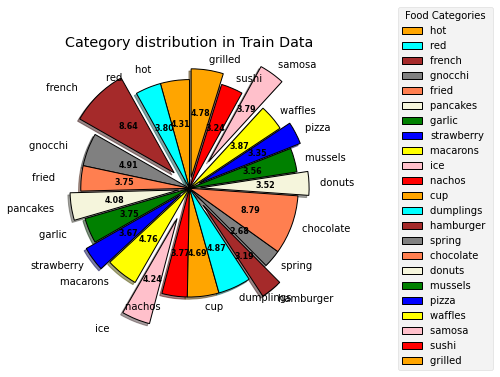

In [ ]:

########################################################################################################################
#_____________________________________________________Cateogories Distribution Of Various CLasses___________________________________________ 
########################################################################################################################


fig = plt.figure(figsize = (15, 5)) 
explode = (0.0, 0.0, 0.2, 0.0, 0.0, 0.1,0.0,0.1,0.0,0.3,0.0,0.0, 0.0, 0.2, 0.0, 0.0, 0.1,0.0,0.1,0.0,0.3,0.0, 0.1) 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
colors = ( "orange", "cyan", "brown", 
          "grey", "coral", "beige","green","blue","yellow","pink","red")
wedges, texts, autotexts = plt.pie(values1,labels = labels,explode = explode,autopct='%1.2f',startangle=90,colors = colors,wedgeprops = wp,shadow = True)
plt.legend(labels, 
          title ="Food Categories", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 1, 1)) 
plt.setp(autotexts, size = 8, weight ="bold")
plt.title("Category distribution in Train Data")
plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
train = np.array(X_train)
train = train / 255.0
test = np.array(X_test)
test = test/255.0

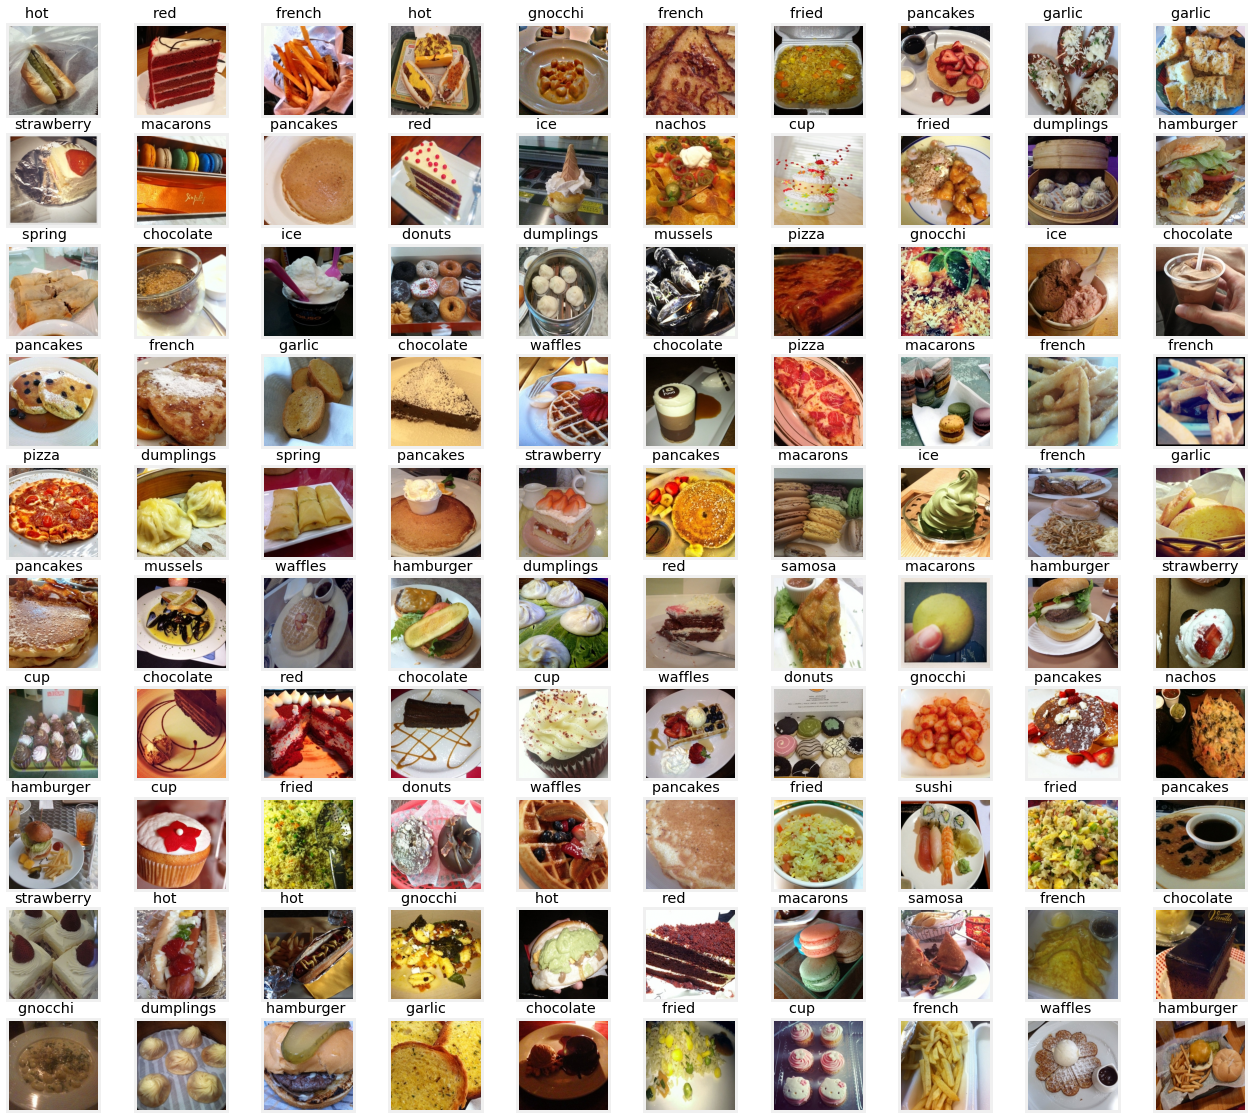

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(train[i])
    plt.title(y_train[i])
plt.show()

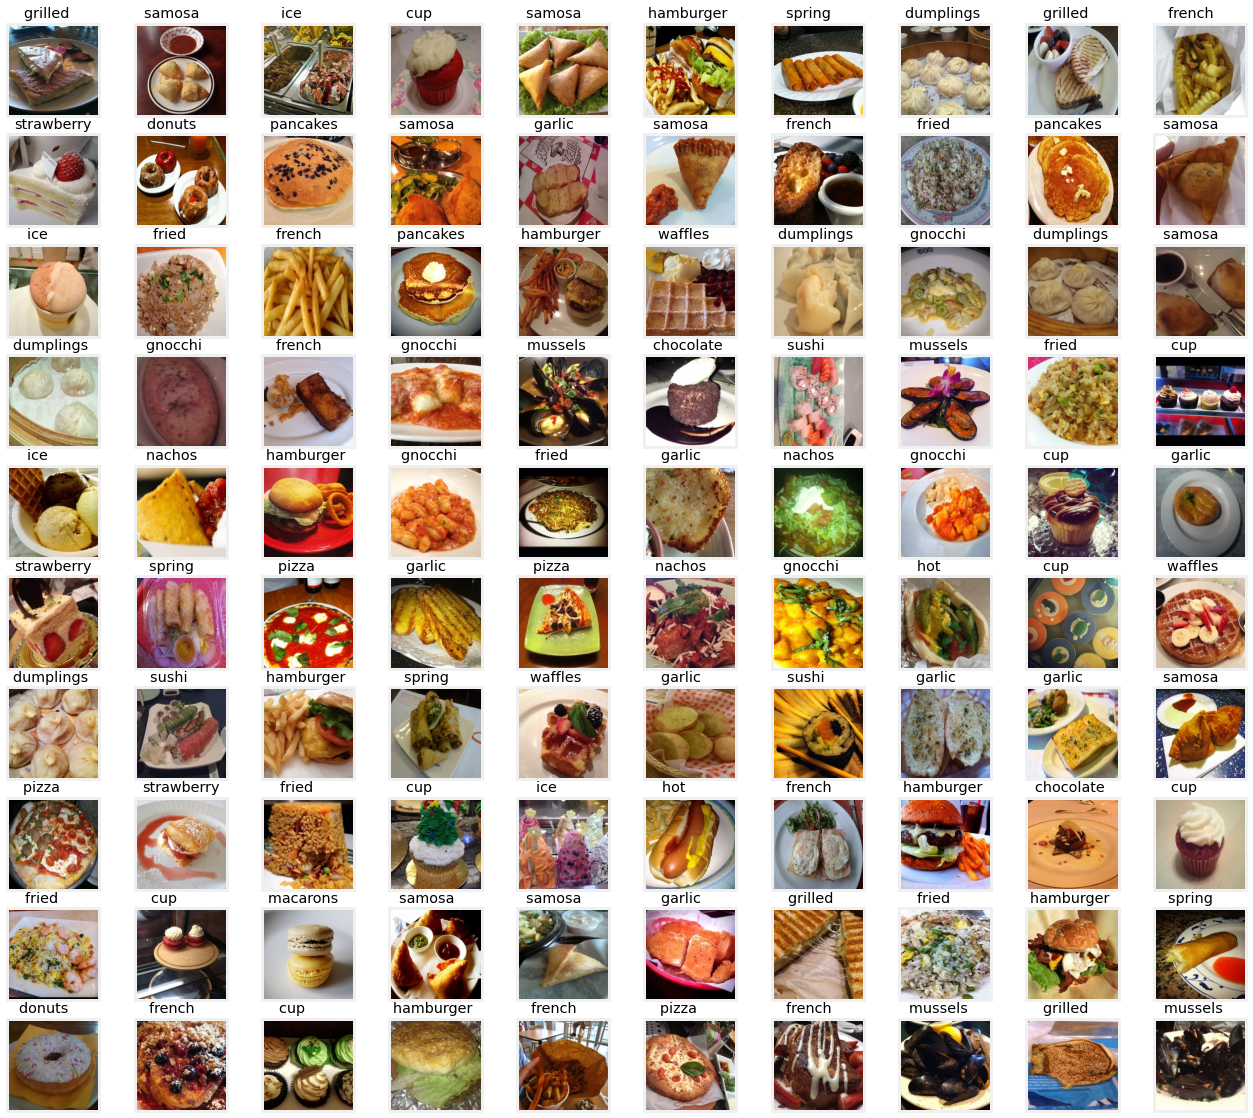

In [ ]:
#Test Part Here

test = X_test
#y_test = data['y_test']
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(test[i])
    plt.title(y_test[i])
plt.show()

In [ ]:
freq_test = {}
for y in y_test:
  if y not in freq_test:
    freq_test[y] = 1

  else:
    freq_test[y] += 1
freq_test

{'chocolate ': 362,
 'cup       ': 195,
 'donuts    ': 133,
 'dumplings ': 186,
 'french    ': 366,
 'fried     ': 160,
 'garlic    ': 146,
 'gnocchi   ': 184,
 'grilled   ': 191,
 'hamburger ': 156,
 'hot       ': 195,
 'ice       ': 189,
 'macarons  ': 165,
 'mussels   ': 141,
 'nachos    ': 122,
 'pancakes  ': 159,
 'pizza     ': 158,
 'red       ': 156,
 'samosa    ': 174,
 'spring    ': 105,
 'strawberry': 143,
 'sushi     ': 140,
 'waffles   ': 152}

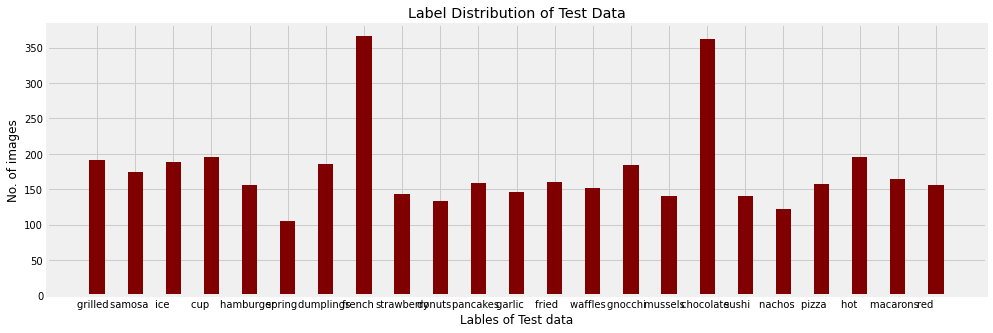

In [ ]:
labels = list(freq_test.keys()) 
values = list(freq_test.values()) 
fig = plt.figure(figsize = (15, 5)) 
# creating the bar plot 
plt.bar(labels, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Lables of Test data") 
plt.ylabel("No. of images") 
plt.title("Label Distribution of Test Data") 
plt.show() 

In [ ]:
len(values)

23

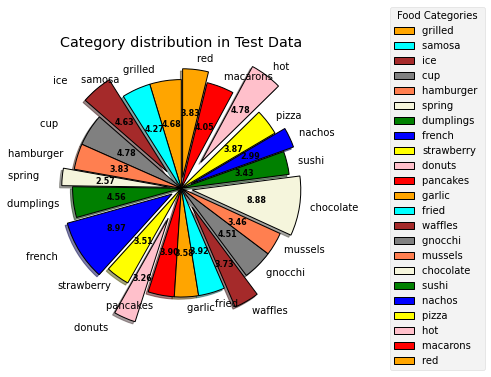

In [ ]:
fig = plt.figure(figsize = (15, 5)) 
explode = (0.0, 0.0, 0.2, 0.0, 0.0, 0.1,0.0,0.1,0.0,0.3,0.0,0.0, 0.0, 0.2, 0.0, 0.0, 0.1,0.0,0.1,0.0,0.3,0.0, 0.1) 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
colors = ( "orange", "cyan", "brown", 
          "grey", "coral", "beige","green","blue","yellow","pink","red")
wedges, texts, autotexts = plt.pie(values,labels = labels,explode = explode,autopct='%1.2f',startangle=90,colors = colors,wedgeprops = wp,shadow = True)
plt.legend(labels, 
          title ="Food Categories", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 1, 1)) 
plt.setp(autotexts, size = 8, weight ="bold")
plt.title("Category distribution in Test Data")
plt.show()